In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

import openweathermapy.core as owm

# Import API key
api_key = "0e208670ed813e1a8af9f83faeaac3f7"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count

city_df = pd.DataFrame(cities_list)

city_df.head(20)



,0
0,general roca
1,ribeira grande
2,ushuaia
3,ningan
4,kargasok
5,palafrugell
6,angoche
7,gat
8,codrington
9,rikitea


In [50]:
# Save config information.
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
weather_url = f"{weather_url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
humidity = []
temp = []
test_lat = []
test_lng = []
windspeed = []
cloudiness = []

# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    weather_info = requests.get(weather_url + city).json()
    
    try:
        test_lat.append(weather_info['coord']['lat'])
    
    except KeyError as exception:
        
        print(f"no latitude data for {city} available")
        
    try:
        test_lng.append(weather_info['coord']['lon'])
    
    except KeyError as exception:
        
        print(f"no longitude data for {city} available")
        
    try:
        temp.append(weather_info['main']['temp'])
    
    except KeyError as exception:
        
        print(f"no temperature data for {city} available")
        
    try:
        humidity.append(weather_info['main']['humidity'])
    
    except KeyError as exception:
        
        print(f"no humidity data for {city} available")
        
    try:
        windspeed.append(weather_info['wind']['speed'])
        
    except KeyError as exception:
        
        print(f"no windspeed data for {city} available")
        
    try:
        cloudiness.append(weather_info['clouds']['all'])
        
    except KeyError as exception:
        
        print(f"no cloudiness data for {city} available")
        
    print(f"gathering temperature, coordinates, humidity, cloudiness, and windspeed information for {city}.")

gathering temperature, coordinates, humidity, cloudiness, and windspeed information for general roca.
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for ribeira grande.
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for ushuaia.
no latitude data for ningan available
no longitude data for ningan available
no temperature data for ningan available
no humidity data for ningan available
no windspeed data for ningan available
no cloudiness data for ningan available
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for ningan.
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for kargasok.
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for palafrugell.
gathering temperature, coordinates, humidity, cloudiness, and windspeed information for angoche.
gathering temperature, coordinates, humidity, cloudiness, and windspee

In [51]:
#store info into a dataframe
weather_dict = {
    #"city": cities_list,
    "lat": test_lat,
    "lon": test_lng,
    "humidity": humidity,
    'temp in celsius': temp,
    "windspeed": windspeed,
    "cloudiness": cloudiness
}
weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.head()

,lat,lon,humidity,temp in celsius,windspeed,cloudiness
0,-39.0333,-67.5833,34,19.22,8.10,95
1,38.5167,-28.7000,73,24.22,7.72,40
2,-54.8000,-68.3000,61,7.81,2.06,75
3,59.0556,80.8572,77,7.63,2.87,100
4,41.9174,3.1631,52,25.19,0.45,21


In [52]:
#convert my celsius temps to fahrenheit

#convert temp to fahrenheit

fahrenheit_temp = []

for temp in weather_data_df['temp in celsius']:
    fahrenheit_temp = (weather_data_df['temp in celsius'] * 9/5) + 32

#weather_data_df.insert(loc=3, column='temp in fahrenheit', value=fahrenheit_temp)

weather_data_df['temp in fahrenheit'] = fahrenheit_temp

weather_data_df.index.name = 'City_ID'

weather_data_df.round(1)

weather_data_df.head()

,lat,lon,humidity,temp in celsius,windspeed,cloudiness,temp in fahrenheit
City_ID,,,,,,,
0,-39.0333,-67.5833,34,19.22,8.10,95,66.596
1,38.5167,-28.7000,73,24.22,7.72,40,75.596
2,-54.8000,-68.3000,61,7.81,2.06,75,46.058
3,59.0556,80.8572,77,7.63,2.87,100,45.734
4,41.9174,3.1631,52,25.19,0.45,21,77.342


In [53]:
#save dataframe to csv file

weather_data_df.to_csv("WeatherDataFrame")

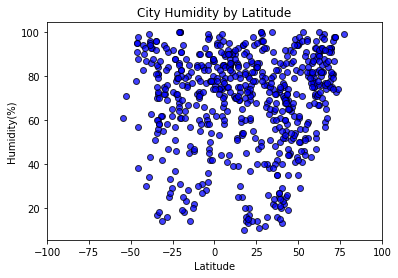

In [54]:
#trials to get the scatterplots

x_axis = weather_data_df['lat']

humidity_y_axis = weather_data_df['humidity']

#set limits and label/title the plot
plt.xlim(-100, 100)
plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#plot the figure incorporating variables
plt.scatter(x_axis, humidity_y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Save Figure
plt.savefig("./Humidity_by_lat")

plt.show()

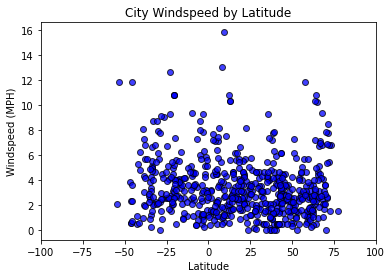

In [55]:
x_axis = weather_data_df['lat']

windspeed_y_axis = weather_data_df['windspeed']

#set limits and label/title the plot
plt.xlim(-100, 100)
plt.title("City Windspeed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (MPH)")

#plot the figure incorporating variables
plt.scatter(x_axis, windspeed_y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Save Figure
plt.savefig("./Windspeed_by_lat")

plt.show()

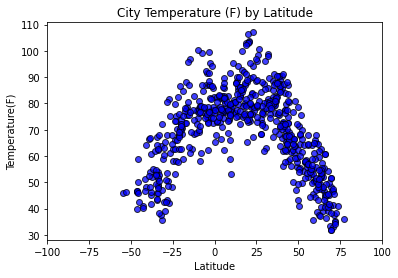

In [56]:
#temperature by latitude

x_axis = weather_data_df['lat']

temp_y_axis = weather_data_df['temp in fahrenheit']

#set limits and label/title the plot
plt.xlim(-100, 100)
plt.title("City Temperature (F) by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

#plot the figure incorporating variables
plt.scatter(x_axis, temp_y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Save Figure
plt.savefig("./Temp_by_lat")

plt.show()

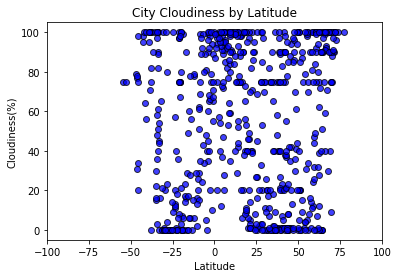

In [57]:
#cloudiness by latitude

x_axis = weather_data_df['lat']

cloudiness_y_axis = weather_data_df['cloudiness']

#set limits and label/title the plot
plt.xlim(-100, 100)
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#plot the figure incorporating variables
plt.scatter(x_axis, cloudiness_y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Save Figure
plt.savefig("./Cloudiness_by_lat")

plt.show()